In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, Imputer, OneHotEncoder, LabelEncoder
import numpy as np

%matplotlib inline


In [3]:
df = pd.read_csv('data/train.csv',sep=';')
df.head()



,VOIE_DEPOT,COUNTRY,SOURCE_BEGIN_MONTH,APP_NB,APP_NB_PAYS,APP_NB_TYPE,FISRT_APP_COUNTRY,FISRT_APP_TYPE,LANGUAGE_OF_FILLING,FIRST_CLASSE,...,oecd_NB_BACKWARD_NPL,IDX_ORIGIN,SOURCE_IDX_ORI,IDX_RADIC,SOURCE_IDX_RAD,VARIABLE_CIBLE,PRIORITY_MONTH,FILING_MONTH,PUBLICATION_MONTH,BEGIN_MONTH
0,EURO-PCT,US,D0,1,1,1,US,COMPAGNY,en,A61K9/48,...,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,09/1995,08/1996,03/1997,09/1995
1,EURO-PCT,DE,D0,1,1,1,DE,COMPAGNY,de,C08G65/26,...,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,11/1999,11/2000,05/2001,11/1999
2,VOIE DIRECTE,JP,D0,1,1,1,JP,COMPAGNY,en,G11B15/07,...,0.125,0.897778,CALC,1.00,IMPUT,GRANTED,06/1992,05/1993,12/1993,06/1992
3,VOIE DIRECTE,GB,D0,1,1,1,GB,COMPAGNY,en,F25B41/04,...,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,05/1994,05/1995,11/1995,05/1994
4,VOIE DIRECTE,DE,D0,1,1,1,DE,COMPAGNY,de,H01F17/06,...,0.000,0.625000,CALC,0.25,CALC,GRANTED,12/1988,11/1989,06/1990,12/1988


In [4]:
df.dtypes


VOIE_DEPOT               object
COUNTRY                  object
SOURCE_BEGIN_MONTH       object
APP_NB                  float64
APP_NB_PAYS             float64
APP_NB_TYPE             float64
FISRT_APP_COUNTRY        object
FISRT_APP_TYPE           object
LANGUAGE_OF_FILLING      object
FIRST_CLASSE             object
NB_CLASSES                int64
NB_ROOT_CLASSES           int64
NB_SECTORS                int64
NB_FIELDS                 int64
TECHNOLOGIE_SECTOR       object
TECHNOLOGIE_FIELD        object
MAIN_IPC                 object
INV_NB                  float64
INV_NB_PAYS             float64
INV_NB_TYPE             float64
FISRT_INV_COUNTRY        object
FISRT_INV_TYPE           object
cited_n                 float64
cited_nmiss             float64
cited_age_min             int64
cited_age_median        float64
cited_age_max             int64
cited_age_mean          float64
cited_age_std           float64
SOURCE_CITED_AGE         object
NB_BACKWARD_NPL           int64
NB_BACKW

In [5]:
def unique(df):
    for col in df.columns:
        l = len(df[col].unique())
        
        print(col+' : ', l)
        print(df[col].unique())
        print('-----------------------------------------------------')

In [6]:
unique(df)

VOIE_DEPOT :  2
['EURO-PCT' 'VOIE DIRECTE']
-----------------------------------------------------
COUNTRY :  91
['US' 'DE' 'JP' 'GB' 'SE' nan 'IT' 'FR' 'EP' 'NO' 'NL' 'KR' 'CH' 'ES' 'WO'
 'YU' 'CN' 'DD' 'DK' 'AT' 'LU' 'FI' 'IS' 'CA' 'NZ' 'AU' 'IL' 'SG' 'AR' 'RU'
 'CZ' 'UA' 'IE' 'SU' 'BE' 'PL' 'IN' 'BR' 'HU' 'EG' 'SK' 'TR' 'RS' 'BG' 'AL'
 'SI' 'TW' 'ZA' 'LV' 'CU' 'CL' 'RO' 'GR' 'SM' 'EE' 'HK' 'PT' 'HR' 'MX' 'MY'
 'MT' 'IR' 'CO' 'CS' 'UY' 'EC' 'VE' 'SV' 'GE' 'BY' 'LB' 'KZ' 'MC' 'PH' 'TH'
 'BA' 'PK' 'ZW' 'MA' 'KP' 'MD' 'IB' 'EA' 'ML' 'ID' 'LT' 'HN' 'AE' 'TN' 'UZ'
 'JO']
-----------------------------------------------------
SOURCE_BEGIN_MONTH :  3
['D0' 'D1' nan]
-----------------------------------------------------
APP_NB :  16
[  1.   4.   2.   3.   7.  nan   5.   6.   9.  10.  13.   8.  17.  11.  16.
  14.]
-----------------------------------------------------
APP_NB_PAYS :  9
[  1.   2.   3.  nan   4.   5.   0.   7.  12.]
-----------------------------------------------------
APP_NB_TYP

# preprocessings

In [7]:
df = df.drop('cited_nmiss', axis=1) # because only 2 values : 0 and Nan 

# dropping columns containing too many categories
df = df.drop(['FISRT_APP_COUNTRY', 'FIRST_CLASSE', 'TECHNOLOGIE_FIELD', 'MAIN_IPC', 'FISRT_INV_COUNTRY'], axis=1)


def binarizer(x,string):
    if x == string:
        return 1
    else:
        return 0

df.VARIABLE_CIBLE = df.VARIABLE_CIBLE.apply(lambda row : binarizer(row,'GRANTED'))
df.SOURCE_IDX_RAD = df.SOURCE_IDX_RAD.apply(lambda row : binarizer(row,'CALC'))
df.SOURCE_IDX_ORI = df.SOURCE_IDX_ORI.apply(lambda row : binarizer(row,'CALC'))
df.SOURCE_CITED_AGE = df.SOURCE_CITED_AGE.apply(lambda row : binarizer(row,'CALC'))
df.VOIE_DEPOT = df.VOIE_DEPOT.apply(lambda row : binarizer(row,'VOIE DIRECTE'))

In [8]:
print(df.SOURCE_BEGIN_MONTH.unique())
df.SOURCE_BEGIN_MONTH = df.SOURCE_BEGIN_MONTH.str.extract('^D([0-1])').astype('float')
print(df.SOURCE_BEGIN_MONTH.unique())

['D0' 'D1' nan]
[  0.   1.  nan]


In [9]:
# extracting the month in date strings:

columns = ['PRIORITY_MONTH', 'FILING_MONTH', 'PUBLICATION_MONTH', 'BEGIN_MONTH']

for col in columns:
    df[col] = df[col].str.extract('^([0-9]{2})').astype('float')

In [10]:
print(len(df))
cols = df.columns

# selecting numerical and strings columns:
string_cols = []
categorical_num_cols = []
continuous_num_cols = []

for col in cols:
    if df[col].dtype == 'object':
        string_cols.append(col)
    elif df[col].dtype in ['float64', 'int64']:
        if len(df[col].unique()) > 40:
            continuous_num_cols.append(col)
        else:
            categorical_num_cols.append(col)
        

data_categorical_num = df[categorical_num_cols].values
data_continuous_num = df[continuous_num_cols].values
data_string = df[string_cols].values

print(categorical_num_cols)
print(continuous_num_cols)
print(string_cols)


print(data_categorical_num)
print(data_continuous_num)

259431
['VOIE_DEPOT', 'SOURCE_BEGIN_MONTH', 'APP_NB', 'APP_NB_PAYS', 'APP_NB_TYPE', 'NB_CLASSES', 'NB_ROOT_CLASSES', 'NB_SECTORS', 'NB_FIELDS', 'INV_NB', 'INV_NB_PAYS', 'INV_NB_TYPE', 'SOURCE_CITED_AGE', 'NB_BACKWARD_I', 'SOURCE_IDX_ORI', 'SOURCE_IDX_RAD', 'VARIABLE_CIBLE', 'PRIORITY_MONTH', 'FILING_MONTH', 'PUBLICATION_MONTH', 'BEGIN_MONTH']
['cited_n', 'cited_age_min', 'cited_age_median', 'cited_age_max', 'cited_age_mean', 'cited_age_std', 'NB_BACKWARD_NPL', 'NB_BACKWARD_XY', 'NB_BACKWARD_AUTRE', 'NB_BACKWARD_PL', 'NB_BACKWARD', 'pct_NB_IPC', 'pct_NB_IPC_LY', 'oecd_NB_ROOT_CLASSES', 'oecd_NB_BACKWARD_PL', 'oecd_NB_BACKWARD_NPL', 'IDX_ORIGIN', 'IDX_RADIC']
['COUNTRY', 'FISRT_APP_TYPE', 'LANGUAGE_OF_FILLING', 'TECHNOLOGIE_SECTOR', 'FISRT_INV_TYPE']
[[  0.   0.   1. ...,   8.   3.   9.]
 [  0.   0.   1. ...,  11.   5.  11.]
 [  1.   0.   1. ...,   5.  12.   6.]
 ..., 
 [  1.   0.   1. ...,  12.   7.  12.]
 [  0.   0.   1. ...,   9.   3.   9.]
 [  0.   0.   2. ...,  11.   6.  12.]]
[[   

In [11]:
# filling Nan in continuous numerical columns :
imputer_continuous = Imputer(missing_values='NaN', strategy='median', axis=0)

imputer_continuous.fit(data_continuous_num)
data_continuous_num = imputer_continuous.transform(data_continuous_num)

df1 = pd.DataFrame(data_continuous_num, columns=continuous_num_cols)

print(len(df1.dropna()))

259431


In [12]:
# filling Nan in categorical numerical columns :
imputer_categorical = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

imputer_categorical.fit(data_categorical_num)
data_categorical_num = imputer_categorical.transform(data_categorical_num)

df2 = pd.DataFrame(data_categorical_num, columns=categorical_num_cols)

print(len(df2.dropna()))

259431


In [13]:
# rebuilding dataFrame :
df3 = pd.DataFrame(data_string, columns=string_cols)
df = pd.concat([df1,df2,df3],axis=1)

In [14]:
unique(df)

cited_n :  58
[  2.   6.   4.   3.   1.   5.  12.  14.   7.   8.   9.  11.  10.  31.  23.
  19.  25.  13.  64.  16.  18.  65.  15.  24.  36.  38.  21.  22.  29.  44.
  35.  40.  32.  27.  47.  61.  30.  59.  28.  48.  20.  73.  50.  26.  49.
  17.  37.  66.  45.  39.  41.  52.  33.  89.  46.  43.  34.  51.]
-----------------------------------------------------
cited_age_min :  6911
[ 7665.   256.   709. ...,  8792.  6984.  3803.]
-----------------------------------------------------
cited_age_median :  11544
[ 7665.   1147.   1541.5 ...,  5518.5  6984.   5160.5]
-----------------------------------------------------
cited_age_max :  8359
[ 7665.  3365.  2374. ...,  8792.  9149.  8001.]
-----------------------------------------------------
cited_age_mean :  21436
[ 7665.         1371.1666667  1541.5       ...,  1796.6666667  5160.5
  5251.6666667]
-----------------------------------------------------
cited_age_std :  27190
[  802.56619665  1188.2685583   1177.3327907  ...,   271.13895576

In [15]:
df = df.dropna()
print(len(df))

237371


In [16]:
df.head()

,cited_n,cited_age_min,cited_age_median,cited_age_max,cited_age_mean,cited_age_std,NB_BACKWARD_NPL,NB_BACKWARD_XY,NB_BACKWARD_AUTRE,NB_BACKWARD_PL,...,VARIABLE_CIBLE,PRIORITY_MONTH,FILING_MONTH,PUBLICATION_MONTH,BEGIN_MONTH,COUNTRY,FISRT_APP_TYPE,LANGUAGE_OF_FILLING,TECHNOLOGIE_SECTOR,FISRT_INV_TYPE
0,2,7665,7665.0,7665,7665.000000,802.566197,0,0,0,0,...,1,9,8,3,9,US,COMPAGNY,en,III - Chemistry,(MISSING)
1,2,7665,7665.0,7665,7665.000000,802.566197,0,0,0,0,...,1,11,11,5,11,DE,COMPAGNY,de,III - Chemistry,(MISSING)
2,6,256,1147.0,3365,1371.166667,1188.268558,1,3,8,11,...,1,6,5,12,6,JP,COMPAGNY,en,I - Electrical engineering,COMPAGNY
3,2,7665,7665.0,7665,7665.000000,802.566197,0,3,0,3,...,1,5,5,11,5,GB,COMPAGNY,en,IV - Mechanical engineering,(MISSING)
4,2,709,1541.5,2374,1541.500000,1177.332791,0,0,6,6,...,1,12,11,6,12,DE,COMPAGNY,de,I - Electrical engineering,(MISSING)


In [17]:
# Encoding categorical features (in string type columns) :

LabEnc = {}
for col in string_cols:
    print(col)
    le = LabelEncoder()
    le.fit(df[col].values)
    df[col] = le.transform(df[col].values)
    
    LabEnc[col] = le


COUNTRY
FISRT_APP_TYPE
LANGUAGE_OF_FILLING
TECHNOLOGIE_SECTOR
FISRT_INV_TYPE


In [18]:
unique(df)

cited_n :  50
[  2.   6.   4.   3.   1.   5.  14.   7.   8.   9.  11.  10.  31.  23.  19.
  25.  13.  64.  16.  12.  65.  18.  15.  24.  36.  38.  21.  22.  29.  44.
  35.  40.  32.  30.  59.  28.  48.  20.  26.  37.  17.  66.  41.  27.  52.
  33.  45.  61.  43.  34.]
-----------------------------------------------------
cited_age_min :  6594
[ 7665.   256.   709. ...,  5619.  6984.  3803.]
-----------------------------------------------------
cited_age_median :  10967
[ 7665.   1147.   1541.5 ...,  4980.   6984.   5160.5]
-----------------------------------------------------
cited_age_max :  7956
[ 7665.  3365.  2374. ...,  6374.  5479.  8001.]
-----------------------------------------------------
cited_age_mean :  19745
[ 7665.          1371.1666667   1541.5        ...,   530.66666667
  1796.6666667   5160.5       ]
-----------------------------------------------------
cited_age_std :  23972
[  802.56619665  1188.2685583   1177.3327907  ...,   271.13895576
  4332.4432483   1104.32163

In [19]:

OneHot = OneHotEncoder(sparse=False)
OneHot.fit(df[string_cols].values)
temp = OneHot.transform(df[string_cols].values)

print(np.shape(temp))

cat_cols = []
for j in range(len(string_cols)):
    for i in range(OneHot.feature_indices_[j+1]-OneHot.feature_indices_[j]):
        cat_cols.append(string_cols[j]+'_'+str(i))

df_temp = pd.DataFrame(temp, columns=cat_cols)
df = pd.concat([df, df_temp], axis=1, join='inner')
df = df.drop(string_cols,axis=1)

df.head()

(237371, 131)


,cited_n,cited_age_min,cited_age_median,cited_age_max,cited_age_mean,cited_age_std,NB_BACKWARD_NPL,NB_BACKWARD_XY,NB_BACKWARD_AUTRE,NB_BACKWARD_PL,...,TECHNOLOGIE_SECTOR_0,TECHNOLOGIE_SECTOR_1,TECHNOLOGIE_SECTOR_2,TECHNOLOGIE_SECTOR_3,TECHNOLOGIE_SECTOR_4,FISRT_INV_TYPE_0,FISRT_INV_TYPE_1,FISRT_INV_TYPE_2,FISRT_INV_TYPE_3,FISRT_INV_TYPE_4
0,2,7665,7665.0,7665,7665.000000,802.566197,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2,7665,7665.0,7665,7665.000000,802.566197,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,6,256,1147.0,3365,1371.166667,1188.268558,1,3,8,11,...,1,0,0,0,0,0,1,0,0,0
3,2,7665,7665.0,7665,7665.000000,802.566197,0,3,0,3,...,0,0,0,1,0,1,0,0,0,0
4,2,709,1541.5,2374,1541.500000,1177.332791,0,0,6,6,...,1,0,0,0,0,1,0,0,0,0


In [20]:
unique(df)

cited_n :  48
[  2.   6.   4.   3.   1.   5.  14.   7.   8.   9.  11.  10.  31.  23.  19.
  25.  13.  64.  16.  12.  65.  18.  15.  24.  36.  38.  21.  22.  29.  44.
  35.  40.  32.  30.  59.  28.  48.  20.  26.  37.  17.  66.  41.  27.  52.
  33.  45.  61.]
-----------------------------------------------------
cited_age_min :  6473
[ 7665.   256.   709. ...,  7178.  6159.  7168.]
-----------------------------------------------------
cited_age_median :  10742
[ 7665.   1147.   1541.5 ...,  4030.5  3563.5  7168. ]
-----------------------------------------------------
cited_age_max :  7845
[ 7665.  3365.  2374. ...,  7050.  7945.  7168.]
-----------------------------------------------------
cited_age_mean :  18922
[ 7665.         1371.1666667  1541.5       ...,  1742.75       1400.75
  2027.8      ]
-----------------------------------------------------
cited_age_std :  22268
[  802.56619665  1188.2685583   1177.3327907  ...,   837.74288589
  1740.9106812    245.54904466]
----------------

In [21]:
len(df)
df = df.dropna()
len(df)

217255

In [22]:
df.head()

,cited_n,cited_age_min,cited_age_median,cited_age_max,cited_age_mean,cited_age_std,NB_BACKWARD_NPL,NB_BACKWARD_XY,NB_BACKWARD_AUTRE,NB_BACKWARD_PL,...,TECHNOLOGIE_SECTOR_0,TECHNOLOGIE_SECTOR_1,TECHNOLOGIE_SECTOR_2,TECHNOLOGIE_SECTOR_3,TECHNOLOGIE_SECTOR_4,FISRT_INV_TYPE_0,FISRT_INV_TYPE_1,FISRT_INV_TYPE_2,FISRT_INV_TYPE_3,FISRT_INV_TYPE_4
0,2,7665,7665.0,7665,7665.000000,802.566197,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2,7665,7665.0,7665,7665.000000,802.566197,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,6,256,1147.0,3365,1371.166667,1188.268558,1,3,8,11,...,1,0,0,0,0,0,1,0,0,0
3,2,7665,7665.0,7665,7665.000000,802.566197,0,3,0,3,...,0,0,0,1,0,1,0,0,0,0
4,2,709,1541.5,2374,1541.500000,1177.332791,0,0,6,6,...,1,0,0,0,0,1,0,0,0,0


In [23]:
df.describe()

,cited_n,cited_age_min,cited_age_median,cited_age_max,cited_age_mean,cited_age_std,NB_BACKWARD_NPL,NB_BACKWARD_XY,NB_BACKWARD_AUTRE,NB_BACKWARD_PL,...,TECHNOLOGIE_SECTOR_0,TECHNOLOGIE_SECTOR_1,TECHNOLOGIE_SECTOR_2,TECHNOLOGIE_SECTOR_3,TECHNOLOGIE_SECTOR_4,FISRT_INV_TYPE_0,FISRT_INV_TYPE_1,FISRT_INV_TYPE_2,FISRT_INV_TYPE_3,FISRT_INV_TYPE_4
count,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,...,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000
mean,2.004161,5604.765511,5743.722046,5921.639267,5754.462087,839.329430,0.557575,0.871906,1.842144,2.715671,...,0.247032,0.154542,0.278194,0.252372,0.067860,0.913028,0.083128,0.000446,0.000184,0.003213
std,0.994809,2987.623627,2806.017052,2631.718385,2787.347630,372.186398,2.978328,1.736921,3.448240,4.129796,...,0.431287,0.361468,0.448110,0.434374,0.251507,0.281794,0.276076,0.021125,0.013568,0.056591
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2002.000000,2567.750000,3368.000000,2598.500000,802.566197,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,7665.000000,7665.000000,7665.000000,7665.000000,802.566197,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,7665.000000,7665.000000,7665.000000,7665.000000,802.566197,0.000000,1.000000,3.000000,5.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,10898.000000,10898.000000,11305.000000,10898.000000,6619.226579,122.000000,70.000000,131.000000,134.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# standardization of columns :
standardize = StandardScaler()
normalized_cols = ['cited_age_min', 'cited_age_median', 'cited_age_max', 'cited_age_mean', 'cited_age_std']

dat = df[normalized_cols].values
standardize.fit(dat)

dat = standardize.transform(dat)

print(len(df))
df_temp = pd.DataFrame(dat, columns=normalized_cols)
df = df.drop(normalized_cols, axis=1)

df = pd.concat([df, df_temp], axis=1, join='inner')
print(len(df))

217255
198878


In [25]:
unique(df)

cited_n :  45
[  2.   6.   4.   3.   1.   5.  14.   7.   8.   9.  11.  10.  31.  23.  19.
  25.  13.  64.  16.  12.  65.  18.  15.  24.  36.  38.  21.  22.  29.  44.
  35.  40.  32.  30.  59.  28.  48.  20.  26.  37.  17.  66.  41.  27.  52.]
-----------------------------------------------------
NB_BACKWARD_NPL :  109
[   0.    1.    4.    2.    3.   12.   45.    6.    5.    8.   25.   43.
   13.   18.   60.   65.    7.   59.   10.   51.   14.    9.  104.   11.
   20.   93.   98.   53.  102.   19.   50.   68.   15.   44.   16.   62.
   58.   72.   23.   30.   24.   82.  101.   73.   21.   27.  100.   17.
  103.   99.   97.  106.   52.   64.   31.   26.   85.   90.   63.   95.
  119.   84.   47.   35.   34.   32.   22.   28.  109.   33.   29.   56.
   41.   39.   88.   87.   42.   48.   55.   83.   86.   67.   36.  122.
   80.   57.   69.   79.   37.   74.   89.   94.   81.   70.   46.  105.
  111.   54.   78.   40.   38.   71.  110.   92.   49.   76.  114.   91.
  107.]
---------------

In [26]:
df.describe()

,cited_n,NB_BACKWARD_NPL,NB_BACKWARD_XY,NB_BACKWARD_AUTRE,NB_BACKWARD_PL,NB_BACKWARD,pct_NB_IPC,pct_NB_IPC_LY,oecd_NB_ROOT_CLASSES,oecd_NB_BACKWARD_PL,...,FISRT_INV_TYPE_0,FISRT_INV_TYPE_1,FISRT_INV_TYPE_2,FISRT_INV_TYPE_3,FISRT_INV_TYPE_4,cited_age_min,cited_age_median,cited_age_max,cited_age_mean,cited_age_std
count,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,...,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000,198878.000000
mean,2.003947,0.558106,0.870770,1.841466,2.713845,3.271951,0.861242,0.757905,0.222583,0.189626,...,0.913243,0.082910,0.000422,0.000196,0.003228,0.000887,0.000830,0.000691,0.000819,-0.000643
std,0.987779,2.996828,1.736798,3.470568,4.148274,6.077928,0.181105,0.168062,0.119860,0.234382,...,0.281479,0.275747,0.020547,0.014002,0.056725,0.999672,0.999760,0.999831,0.999761,0.997652
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002430,0.004604,0.062500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.875999,-2.046935,-2.250109,-2.064499,-2.255137
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.783312,0.664180,0.142857,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,-1.204561,-1.130643,-0.968434,-1.130387,-0.098777
50%,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.941441,0.786010,0.166667,0.071429,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.689591,0.684701,0.662444,0.685434,-0.098777
75%,2.000000,0.000000,1.000000,3.000000,5.000000,5.000000,1.000000,0.886735,0.285714,0.333333,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.689591,0.684701,0.662444,0.685434,-0.098777
max,66.000000,122.000000,70.000000,131.000000,134.000000,234.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.771725,1.836870,2.045573,1.845321,15.529612


# Spliting Data

In [ ]:
Xcolumns = df.columns.tolist()
Xcolumns.remove('VARIABLE_CIBLE')

X = df[Xcolumns].values
Y = df['VARIABLE_CIBLE'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
def plot_roc(Y_test, Y_prob):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
    roc_auc = roc_auc_score(Y_test, Y_prob)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')

# visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f85653898>]], dtype=object)

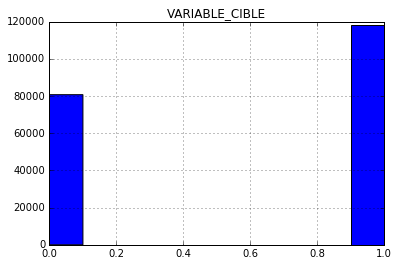

In [27]:
df.hist('VARIABLE_CIBLE')

# Training decision trees

In [28]:
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

In [74]:
max_depth = 3
min_samples_leaf = 5

clf = tree.DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

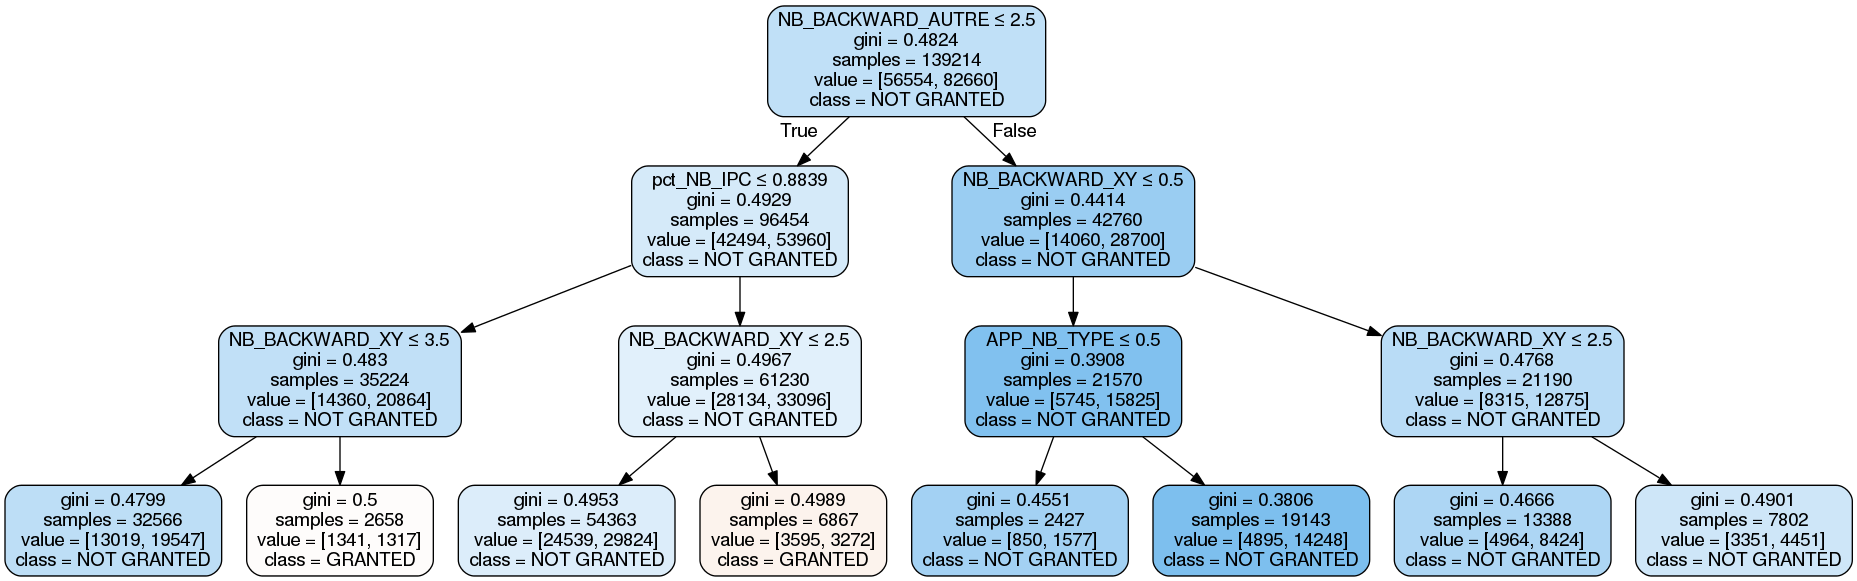

In [75]:
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=Xcolumns,
                         class_names=['GRANTED', 'NOT GRANTED'],
                         filled=True, rounded=True,  
                         special_characters=True)  

content = dot_data.getvalue()
graph = pydotplus.graph_from_dot_data(content)  
Image(graph.create_png())  

In [76]:
Y_pred = clf.predict(X_test)
Y_proba = clf.predict_proba(X_test)
print(Y_proba)

[[ 0.39977277  0.60022723]
 [ 0.3707798   0.6292202 ]
 [ 0.45139157  0.54860843]
 ..., 
 [ 0.52351828  0.47648172]
 [ 0.25570705  0.74429295]
 [ 0.39977277  0.60022723]]


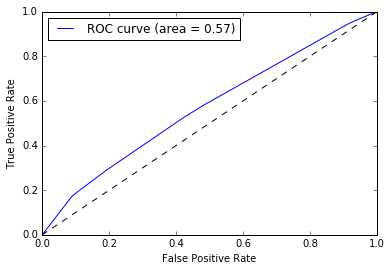

In [77]:
plot_roc(Y_test, Y_proba[:,1])


# Training Random Forest

In [30]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [35]:
estimator = RandomForestClassifier(n_estimators=50)
paramters = {'max_features':[6,9,12,15,20], 'min_samples_split':[1, 2, 5, 10]}

clf = GridSearchCV(estimator, param_grid=paramters, n_jobs=5, cv=5, iid=False, verbose=3)

clf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  9.0min finished


[CV] max_features=6, min_samples_split=1 .............................
[CV] max_features=6, min_samples_split=1 .............................
[CV] max_features=6, min_samples_split=1 .............................
[CV] max_features=6, min_samples_split=1 .............................
[CV] max_features=6, min_samples_split=1 .............................
[CV] .... max_features=6, min_samples_split=1, score=0.592680 -  21.7s[CV] .... max_features=6, min_samples_split=1, score=0.592609 -  21.0s[CV] .... max_features=6, min_samples_split=1, score=0.589053 -  15.5s[CV] .... max_features=6, min_samples_split=1, score=0.592501 -  21.3s[CV] .... max_features=6, min_samples_split=1, score=0.589864 -  20.5s




[CV] max_features=6, min_samples_split=2 .............................
[CV] max_features=6, min_samples_split=2 .............................
[CV] max_features=6, min_samples_split=2 .............................
[CV] max_features=6, min_samples_split=2 .............................
[CV] m

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=False, n_jobs=5,
       param_grid={'max_features': [6, 9, 12, 15, 20], 'min_samples_split': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

[CV] max_features=20, min_samples_split=2 ............................
[CV] max_features=20, min_samples_split=2 ............................
[CV] max_features=20, min_samples_split=2 ............................
[CV] max_features=20, min_samples_split=2 ............................
[CV] ... max_features=20, min_samples_split=2, score=0.597278 -  42.2s[CV] ... max_features=20, min_samples_split=2, score=0.597206 -  35.2s[CV] ... max_features=20, min_samples_split=2, score=0.596523 -  32.7s[CV] ... max_features=20, min_samples_split=2, score=0.596150 -  35.7s[CV] ... max_features=20, min_samples_split=2, score=0.592249 -  34.2s




[CV] max_features=20, min_samples_split=5 ............................
[CV] max_features=20, min_samples_split=5 ............................
[CV] max_features=20, min_samples_split=5 ............................
[CV] max_features=20, min_samples_split=5 ............................
[CV] max_features=20, min_samples_split=5 ............................
[CV] .

In [36]:
clf.best_params_
# {'max_features': 20, 'min_samples_split': 10}

{'max_features': 20, 'min_samples_split': 10}

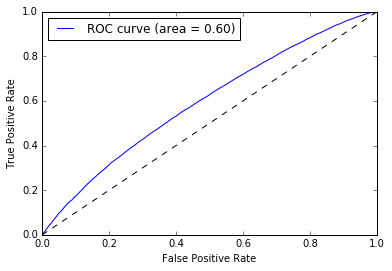

In [38]:
Y_proba = clf.predict_proba(X_test)

plot_roc(Y_test, Y_proba[:,1])

# Training SVM